In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
# Readomg the Nemo and Noaa file
Nemo83 = nemo()
Nemo83.read_nemo('83')
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
run36 = spinup()
run36.readSpin('/scratch/general/am8e13/results36km_newspinup/spinup36km.nc')
run18 = spinup()
run18.readSpin('/scratch/general/am8e13/results18km_newspinup/spinup18km.nc')

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
# Arctic Transects
# Barents Strait
barents = [77,-20,79,10]
# Fram Strait
fram = [80,-13,79,10]
# Bering Strait
bering = [64,-169,67,-168]
#Davis Strait
davis = [66,-61,66,-53]
# Arctic 1
arctic1 = [83,-28,74,136]
# Arctic 2
arctic2 = [71,-139,75,53]
# Arctic 3
arctic3 = [78,-115,76,111]
# Arctic 4
arctic4 = [60,180,60,0]
# St Anna Strait
# 

In [117]:
class Woa:
    def __init__(self):
        self.lat = run36.lat
        self.lon = run36.lon
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/WOA05_THETA_JAN_210x192x50_arctic'
        self.T = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.T = np.squeeze(self.T,axis=0)
        self.T[run36.bathy == 0] = np.nan
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/WOA05_SALT_JAN_210x192x50_arctic'
        self.S = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.S = np.squeeze(self.S,axis=0)
        self.S[run36.bathy == 0] = np.nan
        self.depth = run36.depth
        self.title = 'Woa'
woa = Woa()

In [122]:
class Phc:
    def __init__(self):
        self.lat = run36.lat
        self.lon = run36.lon
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/theta.phc_210_192_50_12'
        self.T = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.T = np.squeeze(self.T,axis=0)
        self.T[run36.bathy == 0] = np.nan
        file1 = '/hpcdata/scratch/am8e13/cs_36km_tutorial/run_input/salt.phc_210_192_50_12'
        self.S = komod.mitbin(file1,xdim=192,ydim=210,zdim=50,datatype='float32')
        self.S = np.squeeze(self.S,axis=0)
        self.S[run36.bathy == 0] = np.nan
        self.depth = run36.depth
        self.title = 'PHC'
phc = Phc()

In [7]:
comp_data = {'run36' : run36, 'run18' : run18 , 'Nemo25' : Nemo25 ,'woa' : woa,'Noaa' : Noaa , 'phc', phc} 

Davis Strait

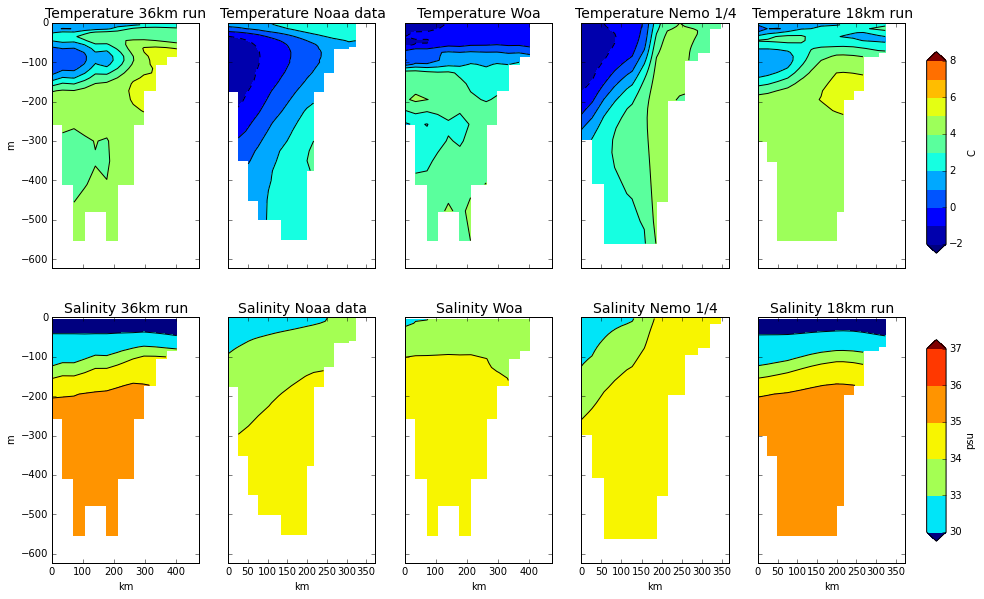

In [8]:
comp_plot(comp_data,davis)

Bering Strait 

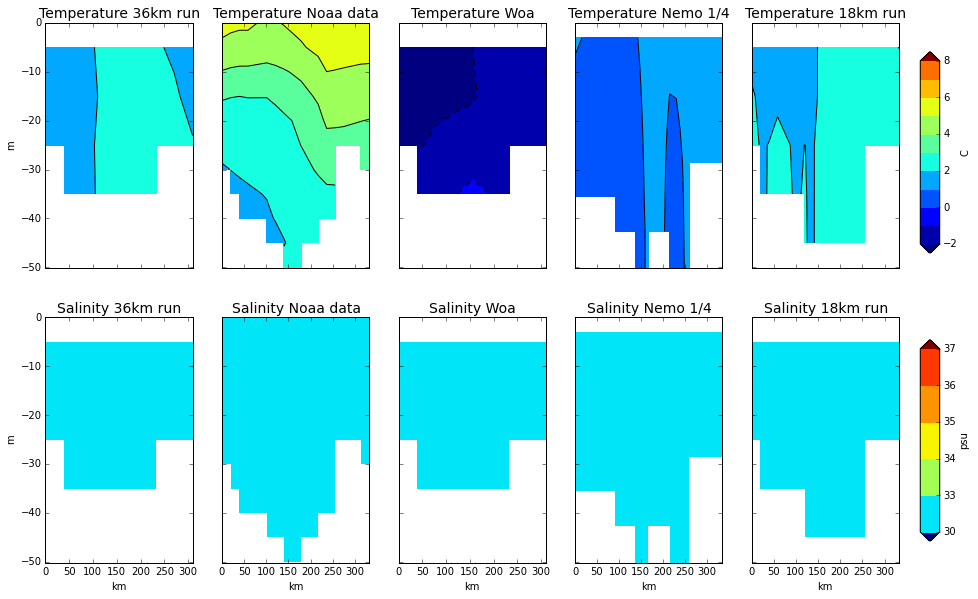

In [9]:
comp_plot(comp_data,bering)

Fram Strait

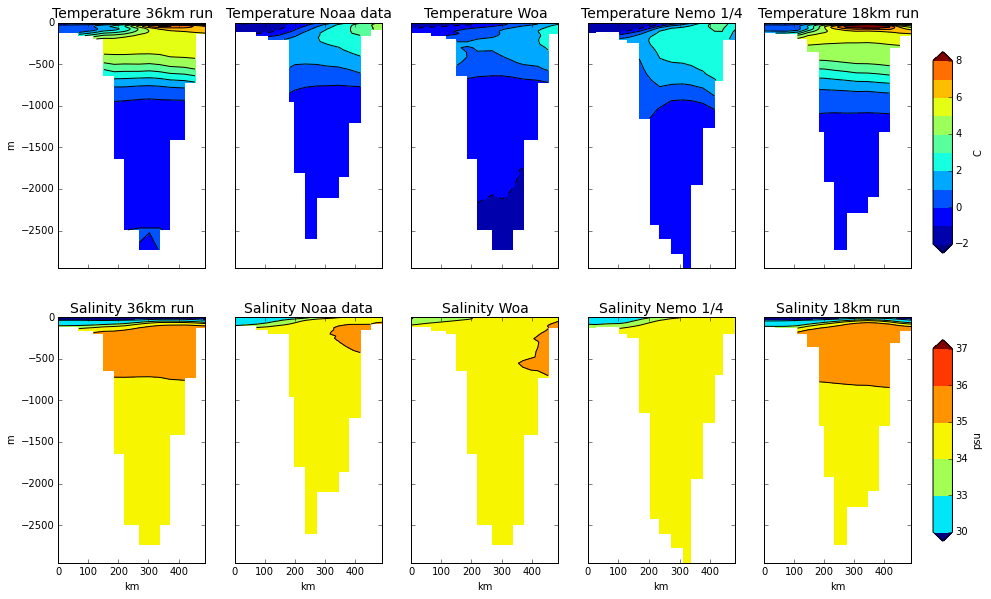

In [10]:
comp_plot(comp_data,fram)

Barents Strait

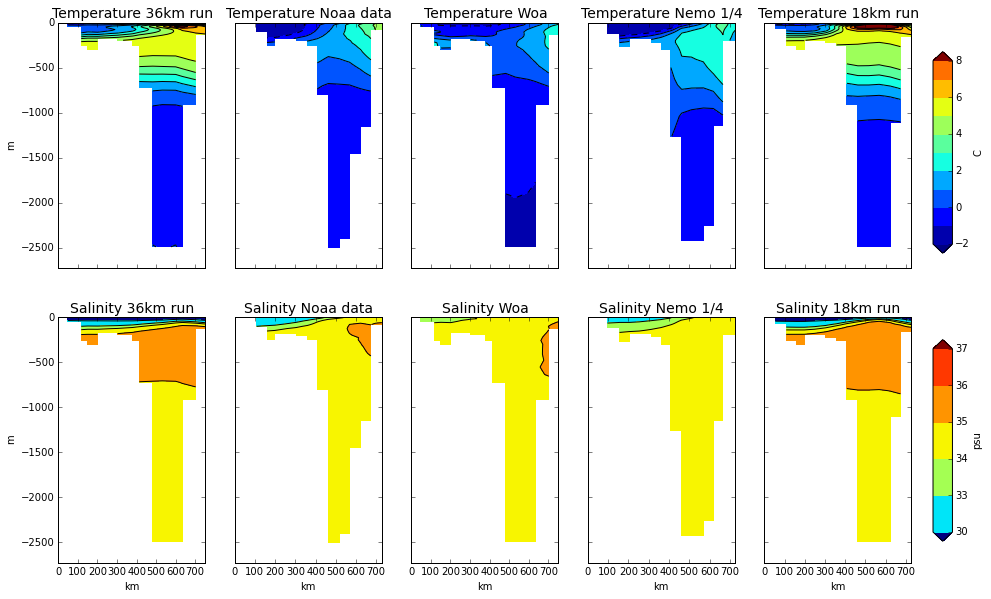

In [11]:
comp_plot(comp_data,barents)

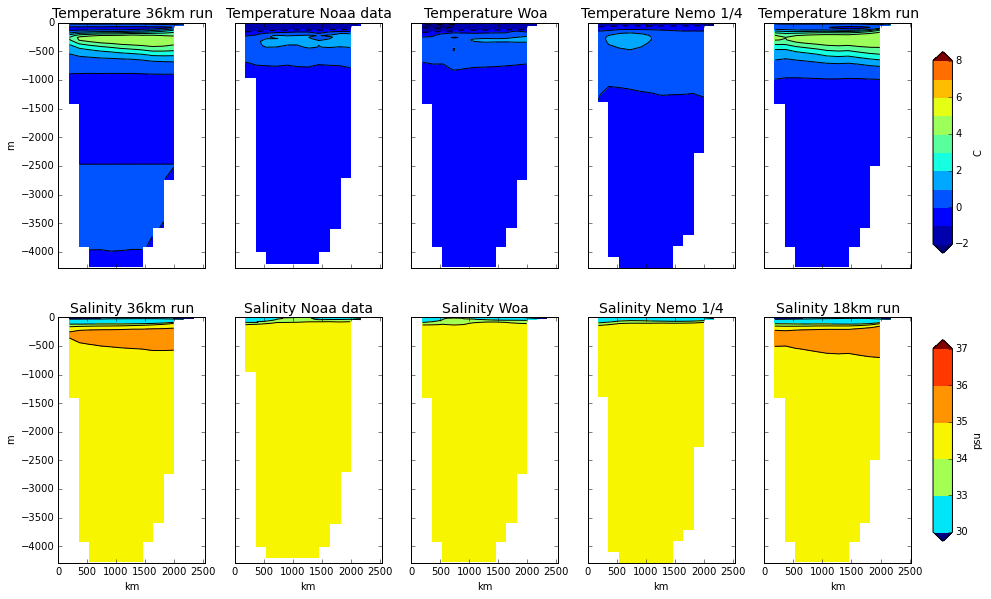

In [12]:
comp_plot(comp_data,arctic1)

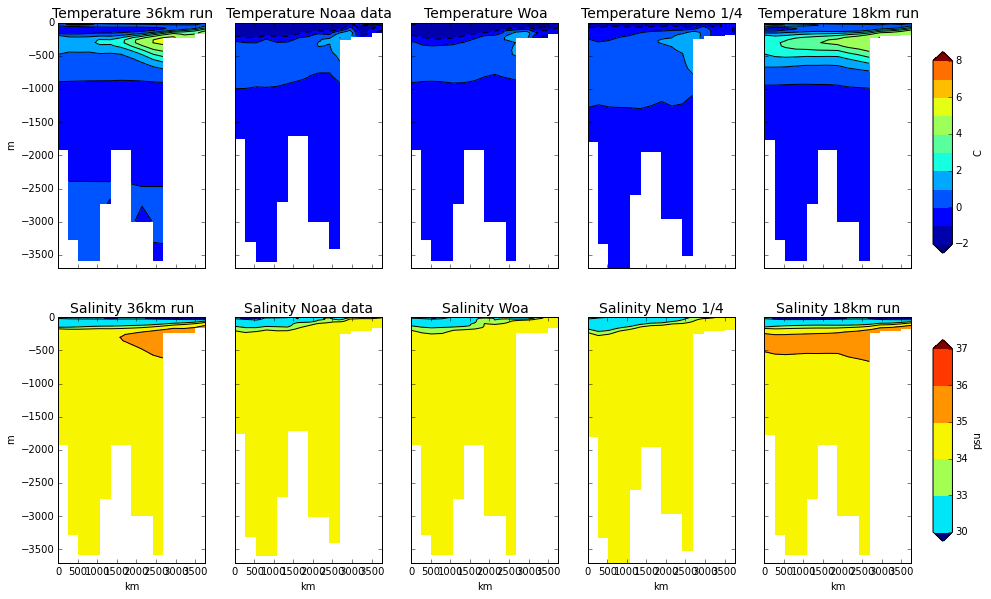

In [13]:
comp_plot(comp_data,arctic2)

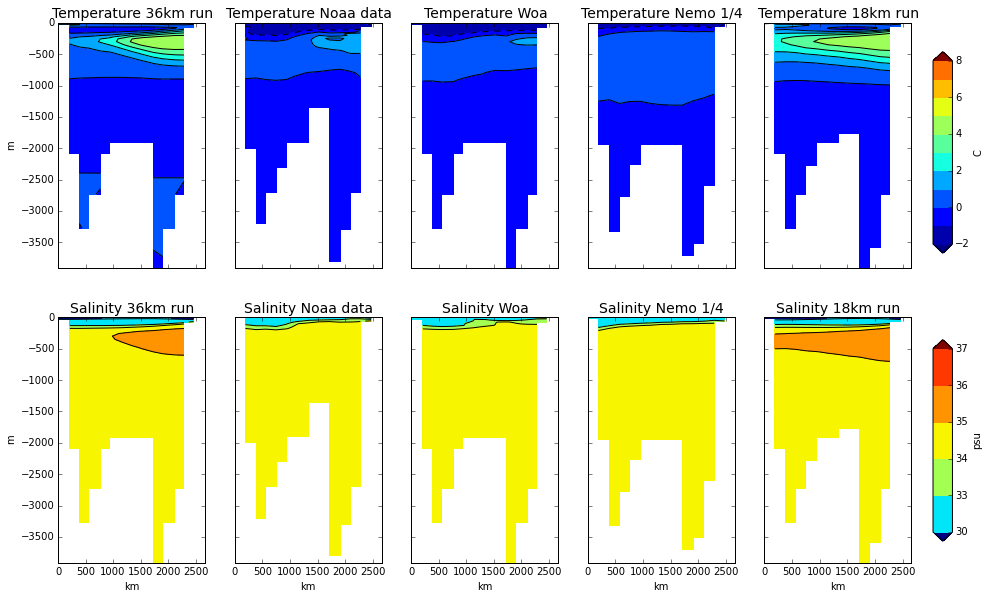

In [14]:
comp_plot(comp_data,arctic3)

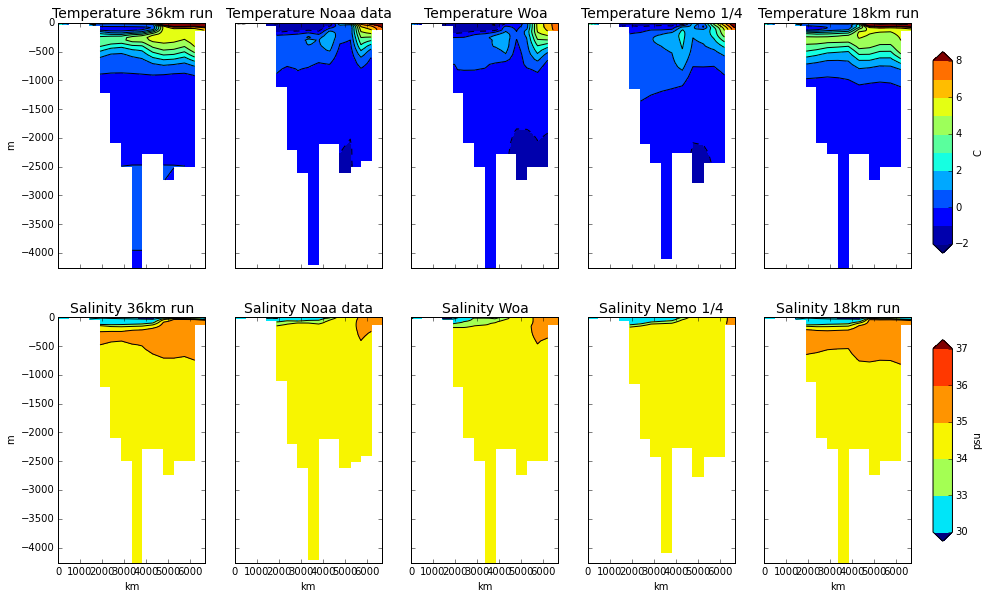

In [15]:
comp_plot(comp_data,arctic4)

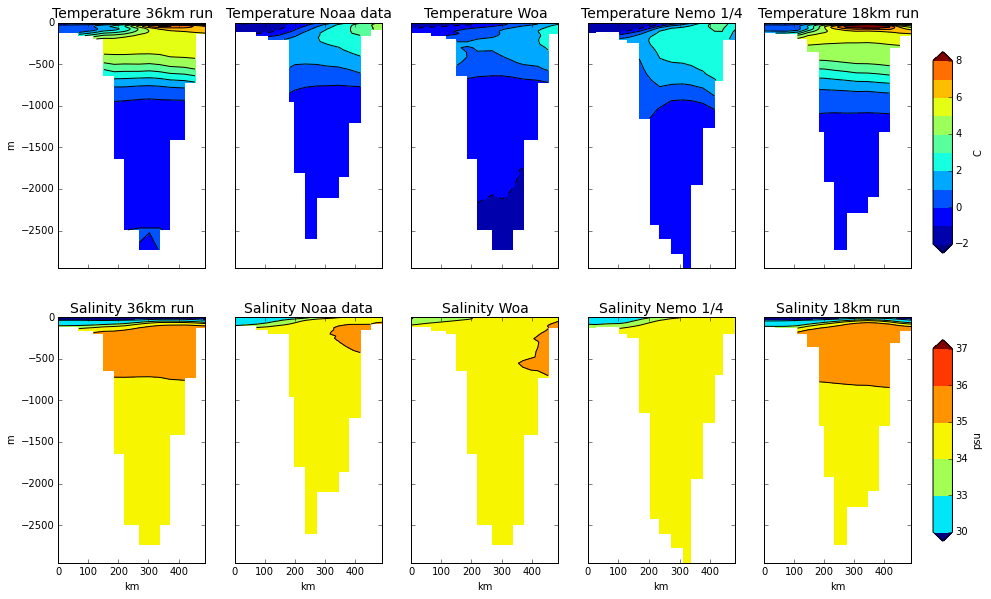

In [16]:
comp_plot(comp_data,fram)

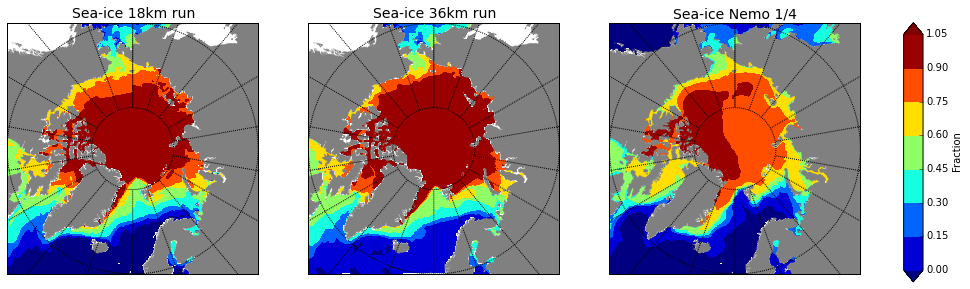

In [17]:
plot_seaice(run18,run36,Nemo25)

In [29]:
def plot_sst(data1,data2,data3,data4):
    vmin = -2
    vmax = 12
    tempbounds = range(vmin,vmax,2)

    cs = plt.contourf(data4.T[0,:,:],vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    plt.colorbar(cs)
    plt.close()

    fig, ((ax1, ax2) , (ax3 ,ax4)) = plt.subplots(2,2)
    ax1 = plt.subplot(2,2,1)
    im1 = bp(data1.lon, data1.lat, data1.T[15,:,:], yescbar = False,  vmin=vmin, vmax=vmax, level=tempbounds, extend='both')
    ax1.set_title('SST '+data1.title)
    ax1.title.set_fontsize('14')

    ax2 = plt.subplot(2,2,2)
    im2 = bp(data2.lon, data2.lat, data2.T[15,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax2.set_title('SST '+data2.title)
    ax2.title.set_fontsize('14')

    ax3 = plt.subplot(2,2,3)
    im3 = bp(data3.lon, data3.lat, data3.T[15,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax3.set_title('SST '+data3.title)
    ax3.title.set_fontsize('14')

    ax4 = plt.subplot(2,2,4)
    im4 = bp(data4.lon, data4.lat, data4.T[15,:,:], yescbar = False, vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax4.set_title('SST '+data4.title)
    ax4.title.set_fontsize('14')

    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(cs, cax=cbar_ax,)
    cbar.ax.set_ylabel('C')

    fig.subplots_adjust(right=1.7,top=2.)

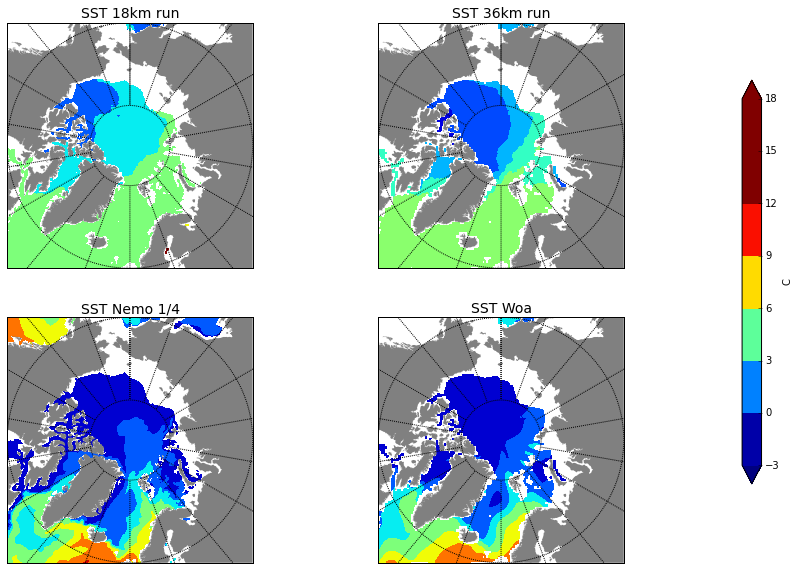

In [30]:
plot_sst(run18,run36,Nemo25,Woa)

In [19]:
run36v = StateRead()
run36v.readData('/scratch/general/am8e13/results36km_newspinup/',range(100))
run36v.fluxCalc()
run18v = StateRead()
run18v.readData('/scratch/general/am8e13/results18km_newspinup/',range(100))
run18v.fluxCalc()

In [20]:
liq10 = {'Fram' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9} ,
             'Bering': {'Inflow' : 1.3, 'Outflow' : 0.0, 'Total flow' :1.3} ,
             'Davis': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6}
            }

In [21]:
for var in ['Barents','Bering','Fram','Davis']:
    print var
    print '36km ',run36v.totalFluxes[var]
    print '18km ',run18v.totalFluxes[var]
    print 'liq10',liq10[var]

Barents
36km  {'Outflow': -0.81, 'Total flow': -0.09, 'Inflow': 0.72}
18km  {'Outflow': -0.89, 'Total flow': -0.13, 'Inflow': 0.76}
liq10 {'Outflow': 4.1, 'Total flow': 2.9, 'Inflow': -1.2}
Bering
36km  {'Outflow': -1.09, 'Total flow': -1.07, 'Inflow': 0.02}
18km  {'Outflow': -1.04, 'Total flow': -1.03, 'Inflow': 0.01}
liq10 {'Outflow': 0.0, 'Total flow': 1.3, 'Inflow': 1.3}
Fram
36km  {'Outflow': -1.17, 'Total flow': 0.8, 'Inflow': 1.97}
18km  {'Outflow': -1.06, 'Total flow': 0.97, 'Inflow': 2.03}
liq10 {'Outflow': -5.5, 'Total flow': -1.6, 'Inflow': 3.9}
Davis
36km  {'Outflow': -1.78, 'Total flow': -0.43, 'Inflow': 1.35}
18km  {'Outflow': -0.82, 'Total flow': -0.29, 'Inflow': 0.53}
liq10 {'Outflow': -3.2, 'Total flow': -2.6, 'Inflow': 0.6}


In [22]:
obcs = np.mean(obcs_tempcorr.data['Et'],axis=0)

NameError: name 'obcs_tempcorr' is not defined

In [ ]:
plt.contourf(obcs_tempcorr.data['Wt'][1,:,0,:])

In [ ]:
plt.contourf(run18.T[:,383,:])

In [ ]:
plt.contourf(Woa.T[:,191,:])

In [ ]:
#plt.contour(obcs_tempcorr.data['Et'])
plt.contourf(obcs_tempcorr.data['Wt'][0,:,0,:])

In [90]:
class ObcsData():
    def __init__(self):
        self.data = {'Ev' : [] , 'Wv' : [] , 'Nv' : [] , \
                     'Eu' : [] , 'Wu' : [] , 'Nu' : [] , \
                     'Et' : [] , 'Wt' : [] , 'Nt' : [] , \
                     'Es' : [] , 'Ws' : [] , 'Ns' : [] }
        self.data_av = {'Ev' : [] , 'Wv' : [] , 'Nv' : [] , \
                     'Eu' : [] , 'Wu' : [] , 'Nu' : [] , \
                     'Et' : [] , 'Wt' : [] , 'Nt' : [] , \
                     'Es' : [] , 'Ws' : [] , 'Ns' : [] }
    def ReadData(self,path,tdim,endingstr,res):
        obcs_data = ['Ev' , 'Wv' , 'Nv' , 'Eu' , 'Wu' , 'Nu' , 'Et' , 'Wt' , 'Nt' , 'Es' , 'Ws' , 'Ns' ]
        
        if res == 18:
            xdim = [420,1]
            ydim = [384,1]
            file_res = "_arctic_420x384."
        elif res == 36:
            xdim = [210,1]
            ydim = [192,1]
            file_res = "_arctic_210x192."
        elif res == 9:
            xdim = [840,1]
            ydim = [768,1]
            file_res = "_arctic_840x768."
        zdim = 50
        
        for var in obcs_data:
            if var == 'Nu' or var == 'Nv' or var == 'Ns' or var == 'Nt':
                xdim_i = 0
                ydim_i = 1
            elif var == 'Wu' or var == 'Wv' or var == 'Ws' or var == 'Wt' or \
                    var == 'Eu' or var == 'Ev' or var == 'Es' or var == 'Et':
                xdim_i = 1
                ydim_i = 0
            
            if var == 'Es' or var == 'Ns' or var == 'Ws':
                stable = 'stable'
                ending = ''
            elif var == 'Et' or var == 'Nt' or var == 'Wt':
                stable = 'stable'
                ending = endingstr
            else:
                stable = 'bin'
                ending = ''
                
            name = path+'/OB'+str(var)+file_res+str(stable)+'_mean'+str(ending)
            data = komod.mitbin(name,xdim=xdim[xdim_i],ydim=ydim[ydim_i],zdim=50,tdim=tdim,datatype='float32')
            data_av_temp = np.mean(np.mean(np.mean(data,axis=3),axis=2),1)    
            self.data[var] = data #_av_temp
            #self.data_av[var] = data_av_temp
            data_climy_33_years = []
            for year in range(10):
                data_climy_33_years = np.concatenate([data_climy_33_years, data_av_temp])
            self.data_av[var] = data_climy_33_years 
            self.mean = {}
            for var in obcs_data:
                self.mean[var] = np.mean(self.data[var],axis = 0)
    

In [91]:
obcs_tempcorr = ObcsData()
obcs_tempcorr.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [93]:
obcs_tempcorr.mean['Es'].shape

(50, 1, 192)

In [108]:
class Obcs:
    def __init__(self):
        self.T = np.zeros_like(run36.S)
        self.T[:,:,209] = obcs_tempcorr.mean['Et'][:,0,:]
        self.T[:,:,0] = obcs_tempcorr.mean['Wt'][:,0,:]
        self.T[:,191,:]= obcs_tempcorr.mean['Nt'][:,:,0]
        self.T[run36.bathy==0] = np.nan
        self.S = np.zeros_like(run36.S)
        self.S[:,:,209] = obcs_tempcorr.mean['Es'][:,0,:]
        self.S[:,:,0] = obcs_tempcorr.mean['Ws'][:,0,:]
        self.S[:,191,:]= obcs_tempcorr.mean['Ns'][:,:,0]
        self.S[run36.bathy==0] = np.nan
obcs = Obcs()

In [96]:
toplot = {'run36' : run36 , 'obcs' : Obcs , 'run18' : run18 , 'woa' : Woa}

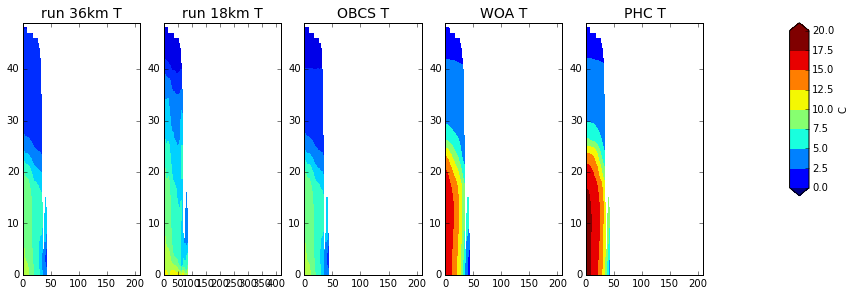

In [124]:
def plot_obcs(data1,data2,data3,data4,data5,loc,vmin,vmax,row=1,col=5):
    vmin = vmin
    vmax = vmax
    tempbounds = range(vmin,vmax,2)
    if loc == 'N':
        data1 = np.array(data1[:,191,:])
        data2 = np.array(data2[:,191*2,:])
        data3 = np.array(data3[:,191,:])
        data4 = np.array(data4[:,191,:])
        data5 = np.array(data5[:,191,:])
    elif loc == 'E':
        data1 = np.array(data1[:,:,209])
        data2 = np.array(data2[:,:,209*2])
        data3 = np.array(data3[:,:,209])
        data4 = np.array(data4[:,:,209])
        data5 = np.array(data5[:,:,209])
    elif loc == 'W':
        data1 = np.array(data1[:,:,0])
        data2 = np.array(data2[:,:,0])
        data3 = np.array(data3[:,:,0])
        data4 = np.array(data4[:,:,0])
        data5 = np.array(data5[:,:,0])
        
    cs = plt.contourf(data4,vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    plt.colorbar(cs)
    plt.close()

    fig, ((ax1, ax2 , ax3 ,ax4 , ax5)) = plt.subplots(1,5)
    ax1 = plt.subplot(1,5,1)
    im1 = plt.contourf(data1,vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax1.set_title('run 36km T')
    ax1.title.set_fontsize('14')

    ax2 = plt.subplot(1,5,2)
    im2 = plt.contourf(data2,vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax2.set_title('run 18km T')
    ax2.title.set_fontsize('14')

    ax3 = plt.subplot(1,5,3)
    im3 = plt.contourf(data3,vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax3.set_title('OBCS T')
    ax3.title.set_fontsize('14')
    
    ax4 = plt.subplot(1,5,4)
    im4 = plt.contourf(data4,vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax4.set_title('WOA T')
    ax4.title.set_fontsize('14')
    
    ax5 = plt.subplot(1,5,5)
    im5 = plt.contourf(data5,vmin=vmin,vmax=vmax,level=tempbounds,extend='both')
    ax5.set_title('PHC T')
    ax5.title.set_fontsize('14')


    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, .6])
    cbar = plt.colorbar(cs, cax=cbar_ax,)
    cbar.ax.set_ylabel('C')

    fig.subplots_adjust(right=1.7,top=1.)


plot_obcs(run36.T,run18.T,obcs.T,woa.T,phc.T,loc='N',vmin=-1,vmax=18)

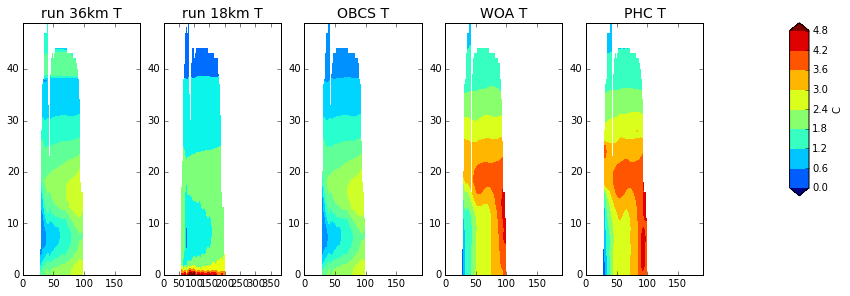

In [135]:
plot_obcs(run36.T,run18.T,obcs.T,woa.T,phc.T,loc='E',vmin=-1,vmax=5)

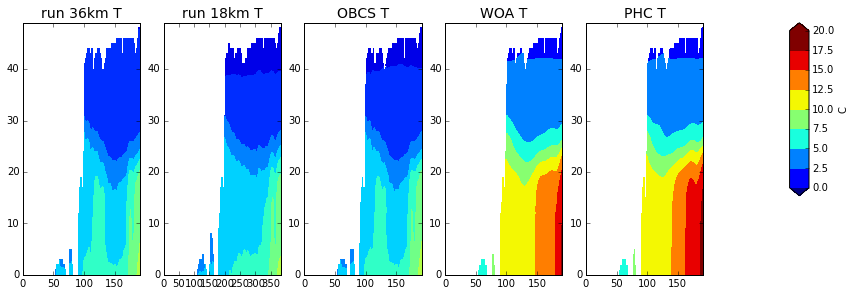

In [127]:
plot_obcs(run36.T,run18.T,obcs.T,woa.T,phc.T,loc='W',vmin=-1,vmax=18)

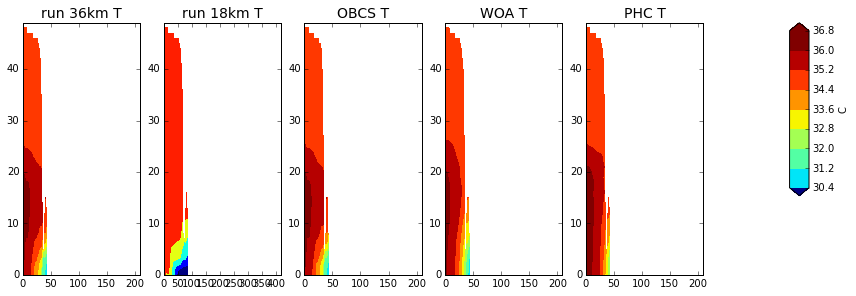

In [131]:
plot_obcs(run36.S,run18.S,obcs.S,woa.S,phc.S,loc='N',vmin=28,vmax=36)

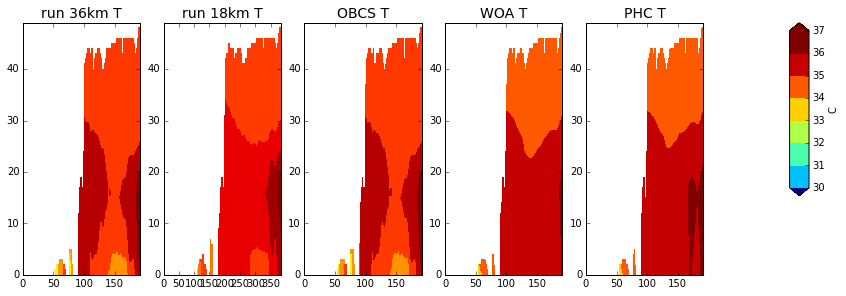

In [132]:
plot_obcs(run36.S,run18.S,obcs.S,woa.S,phc.S,loc='W',vmin=28,vmax=36)

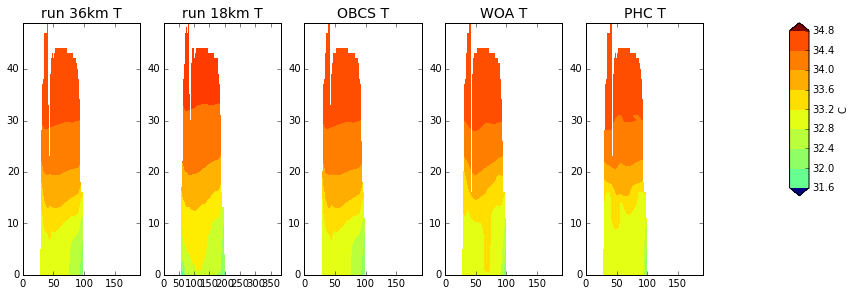

In [133]:
plot_obcs(run36.S,run18.S,obcs.S,woa.S,phc.S,loc='E',vmin=28,vmax=36)